In [1]:
from Utils import PlotUtlis, create_folder, mm2inch, set_mpl_defaults

import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
run_id = 'e52c8ac9a3e24c75ac871f63bbdea060'
exp_id = '115656750127464383'

In [3]:
PU = PlotUtlis(run_id = run_id, exp_id = exp_id)

In [4]:
create_folder(PU.plot_path_embedding_correlation)

### Calculatethe relationship betwwen non-environmental species embedding vectors and indices

In [5]:
coocc_counts = PU.set_cooccurrence_counts(species_list = PU.species_list_train)

In [6]:
vec_stack = None
for species in PU.species_list_train:
    if vec_stack is None:
        vec_stack = np.array(PU.coocc_vector[species])[None, :]
    else:
        vec_stack = np.concatenate((vec_stack, np.array(PU.coocc_vector[species])[None, :]))
cos_similarity_matrix = cosine_similarity(vec_stack, vec_stack)
euclidean_distances_matrix = euclidean_distances(vec_stack, vec_stack)

In [7]:
cos_similarity_list = []
euclidean_dist_list = []
for i, data in coocc_counts.iterrows():
    cos_similarity_list.append(cos_similarity_matrix[PU.species_list_train.index(data.sp1), PU.species_list_train.index(data.sp2)])
    euclidean_dist_list.append(euclidean_distances_matrix[PU.species_list_train.index(data.sp1), PU.species_list_train.index(data.sp2)])
coocc_counts['cosine_similarity'] = cos_similarity_list
coocc_counts['euclidean_distance'] = euclidean_dist_list

### plotting

In [8]:
set_mpl_defaults()

0.62270386590939 0.0


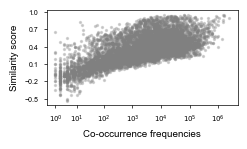

In [9]:
rho, p = scipy.stats.spearmanr(coocc_counts.counts, coocc_counts.cosine_similarity)
print(rho, p)
fig, ax = plt.subplots(figsize = mm2inch(60, 35), constrained_layout = True)
ax.scatter(x = np.log10(coocc_counts.counts+1), 
           y = coocc_counts.cosine_similarity, 
           alpha = 0.3, 
           color =  'grey', 
           s = 2)
ax.set_ylabel('Similarity score')
ax.set_xlabel('Co-occurrence frequencies')

ticks = [1, 10, 100, 1000, 10000, 100000, 1000000]  
ax.set_xticks(np.log10(np.array(ticks)+1))  
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"$10^{{{int(x)}}}$"))  
ax.set_yticks([-0.5, -0.2, 0.1, 0.4, 0.7, 1.0])

plot_output = os.path.join(PU.plot_path_embedding_correlation, 'scatter_cosinesimilarity.pdf')
fig.savefig(plot_output, dpi = 500, transparent = True)

-0.34172191290007237 2.1017609978131236e-194


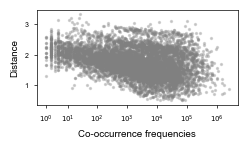

In [10]:
rho, p = scipy.stats.spearmanr(coocc_counts.counts, coocc_counts.euclidean_distance)
print(rho, p)
fig, ax = plt.subplots(figsize = mm2inch(60, 35), constrained_layout = True)
ax.scatter(x = np.log10(coocc_counts.counts+1), 
           y = coocc_counts.euclidean_distance, 
           alpha = 0.3, 
           color = 'grey', 
           s = 2)
ax.set_ylabel('Distance')
ax.set_xlabel('Co-occurrence frequencies')

ticks = [1, 10, 100, 1000, 10000, 100000, 1000000]
ax.set_xticks(np.log10(np.array(ticks)+1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"$10^{{{int(x)}}}$"))

plot_output = os.path.join(PU.plot_path_embedding_correlation, 'scatter_euclideandistance.pdf')
fig.savefig(img_path, dpi = 500, transparent=True)